<a href="https://colab.research.google.com/github/xing-wang-kai/DEEPLEARN_FASHIONIST/blob/main/Classificador_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARN 1

## KERAS


Extrair caracterista das imagens com funções.

In [1]:
import tensorflow
from tensorflow import keras

dataset = keras.datasets.fashion_mnist
((x_train, y_train), (x_test, y_test)) = dataset.load_data()

In [2]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

60000
60000
10000
10000


In [3]:
print((x_train.shape))
print((y_train.shape))
print((x_test.shape))
print((y_test.shape))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, '9')

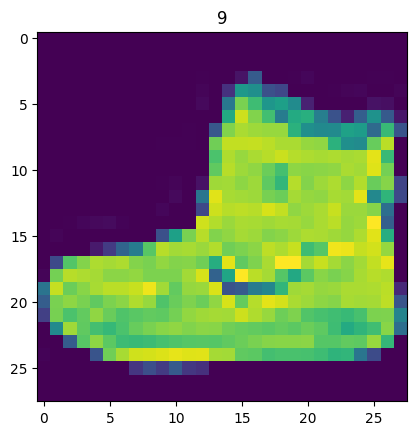

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(y_train[0])

In [5]:
y_train.min()

0

In [6]:
y_train.max()

9

In [7]:
total_class = 10


In [8]:
def print_imagens(tot):
  for img in range(tot):
    plt.subplot(2, 5, img+1)
    plt.imshow(x_train[img])
    plt.title(y_train[img])

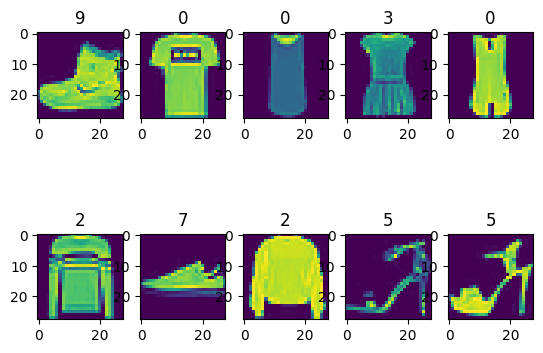

In [9]:
print_imagens(total_class)

| LABEL | DESCRIPTION|
| ----- | -----------|
| 0 | t-shirt/top |
| 1 | Troser |
| 2 | Pullover|
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shrit |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [10]:
class_names = ['Camisetas', 'Calças', 'Pullover', 'Vestidos', 'Casacos', 'Sandálias', 'Camisa', 'Tenis','Bolsa', 'Botas' ]
class_names[9]

'Botas'

In [11]:
def print_imagens(tot):
  for img in range(tot):
    plt.subplot(2, 5, img+1)
    plt.imshow(x_train[img])
    plt.title(class_names[y_train[img]])
    plt.colorbar()

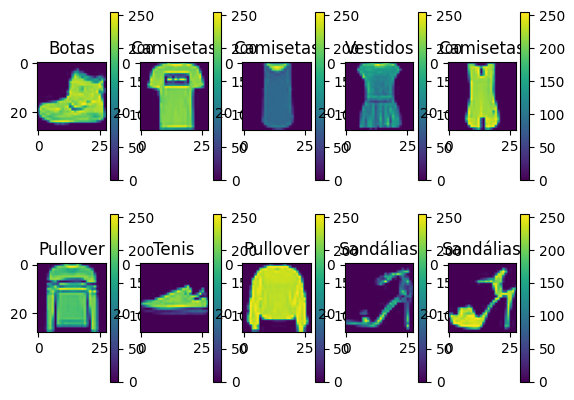

In [12]:
print_imagens(total_class)

# ESTAPAS

* MODELO - SEQUENCIAL
  1. ENTRADA
  2. processamento
  3. Sáida

primeiro importa o Sequential. e Flatten do Keras
Depois usar no Flatter o input_shape para informar a dimensão que possui a IMG


In [13]:
# Função com 2 densidades para DEEP LEARN
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from tensorflow.nn import relu, softmax

x_train = x_train/float(255)

# Normalização das imagens ( scalas de cores da img )
x_train = x_train/float(255)

keras_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation=relu),
    Dropout(0.2),
    Dense(10, activation=softmax)
])


## COMPILANDO E TREINANDO O MODELO

Para antes de treinar um modelo precisamos usar o compile para comilar o modelo, onde precisamos passar alguns valores para optimizer, loss e metrics

Depois podemos treinar o modelo passando o Train em x o Train em Y ( features, class ) e então retornar o treino desjado.

In [14]:
keras_model.compile(optimizer = 'adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
historico = keras_model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 1.1113 - accuracy: 0.6432 - val_loss: 0.7033 - val_accuracy: 0.7479
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6655 - accuracy: 0.7599 - val_loss: 0.5938 - val_accuracy: 0.7844
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5867 - accuracy: 0.7876 - val_loss: 0.5428 - val_accuracy: 0.8067
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5403 - accuracy: 0.8053 - val_loss: 0.5084 - val_accuracy: 0.8185
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.5097 - accuracy: 0.8184 - val_loss: 0.4857 - val_accuracy: 0.8270
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4878 - accuracy: 0.8269 - val_loss: 0.4680 - val_accuracy: 0.8327
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4703 - accuracy: 0.8337 - val_loss: 0.4548 - val_accuracy

## SALVANDO MODELO

Após treinar um modelo e certificar que os dados estão coerentes podemos então salvar esse modelo e carregar ele para sempre usar a mesma base, o formado de salvamento comum para esse modelo é h5

In [24]:
from tensorflow.keras.models import load_model

keras_model.save('model.h5')
saved_model = load_model('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# OVERFIT e UNDERFIT

OverFit é quando nosso treino se adapta demais ao nosso modelo, viciando o modelo oque ocorre erros no nosso treino que a medida que o modelo melhorar para o treino piora para o teste.

Underfit é o contrário nosso modelo fica pésimo para o teste e treino redunzindo assim os parametros o que é péssimo para o modelo.

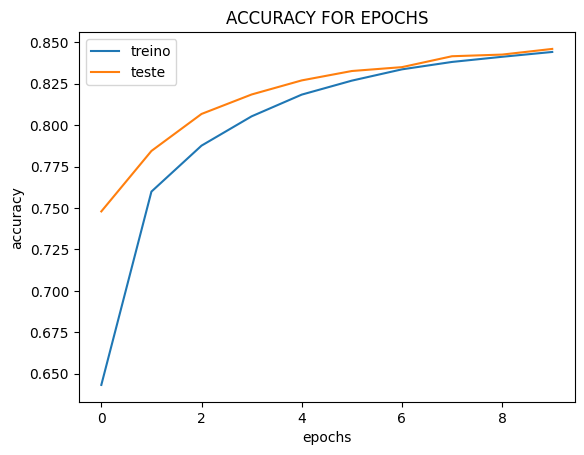

In [15]:
train_acc = historico.history['accuracy']
val_acc = historico.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('ACCURACY FOR EPOCHS')
plt.xlabel( 'epochs')
plt.ylabel('accuracy')
plt.legend(['treino', 'teste'])

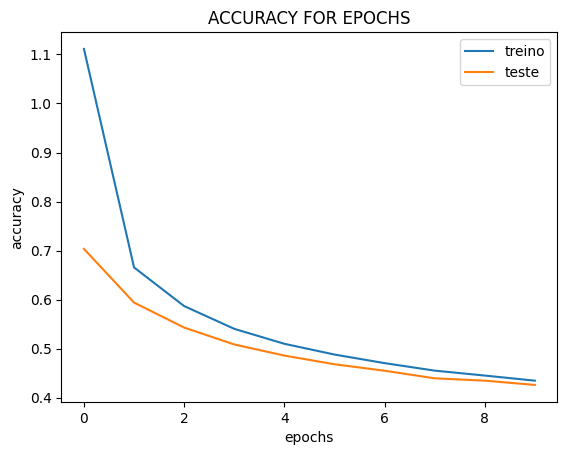

In [16]:
train_acc = historico.history['loss']
val_acc = historico.history['val_loss']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('ACCURACY FOR EPOCHS')
plt.xlabel( 'epochs')
plt.ylabel('accuracy')
plt.legend(['treino', 'teste'])

In [17]:
y_train.shape

(60000,)

# VALIDANDO RESULTADOS

Por fim podemos usar a funções para validar os resultados alcançados com predict, podemos usar do modelo savo também. a função retorna a accuracia total dos teste em todas dimensões.

In [18]:
import numpy as np

In [28]:
predict = keras_model.predict(x_test)
print(f'PREDICTO : {np.argmax(predict[0])}')
print(f'REAL     : {y_test[0]}')

313/313 [==============================] - 1s 4ms/step
PREDICTO : 9
REAL     : 9


In [29]:
for i in range(20):
  print(f'INDEX: : {i}')
  print(f'PREDICTO : {np.argmax(predict[i])}')
  print(f'REAL     : {y_test[i]}')
  print(f"---"*20)


INDEX: : 0
PREDICTO : 9
REAL     : 9
------------------------------------------------------------
INDEX: : 1
PREDICTO : 2
REAL     : 2
------------------------------------------------------------
INDEX: : 2
PREDICTO : 1
REAL     : 1
------------------------------------------------------------
INDEX: : 3
PREDICTO : 1
REAL     : 1
------------------------------------------------------------
INDEX: : 4
PREDICTO : 6
REAL     : 6
------------------------------------------------------------
INDEX: : 5
PREDICTO : 1
REAL     : 1
------------------------------------------------------------
INDEX: : 6
PREDICTO : 4
REAL     : 4
------------------------------------------------------------
INDEX: : 7
PREDICTO : 4
REAL     : 6
------------------------------------------------------------
INDEX: : 8
PREDICTO : 7
REAL     : 5
------------------------------------------------------------
INDEX: : 9
PREDICTO : 7
REAL     : 7
------------------------------------------------------------
INDEX: : 10
PREDICTO

In [21]:
lost_test, accuracy_test = keras_model.evaluate(x_test, y_test)
print(f"EVALUATE SCOR : {lost_test}")
print(f'ACCURACY SCORE : {accuracy_test}')

313/313 [==============================] - 1s 3ms/step - loss: 17191.0586 - accuracy: 0.7189
EVALUATE SCOR : 17191.05859375
ACCURACY SCORE : 0.7189000248908997


In [30]:
test_model_saved = saved_model.predict(x_test)
print(f'PREDICTO : {np.argmax(test_model_saved[25])}')
print(f'REAL     : {y_test[25]}')

313/313 [==============================] - 1s 3ms/step
PREDICTO : 4
REAL     : 4
